Que A. Read data file university_rankings.csv in pandas dataframe and based
on this data answer the following questions.


In [2]:
import pandas as pd # importing pandas as pd for this workspace
import matplotlib as plt

In [4]:
uni = pd.read_csv('../data/university_rankings.csv') #reading the given file

In [4]:
uni.head() #displays first 5 rows from the csv file

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


**1. Find out the data is for which years using the years column?**


In [6]:
years = pd.unique(uni['year']) # this prints all the UNIQUE elements of year column 
print('this data is for following years', years)

this data is for following years [2012 2013 2014 2015]


2. Find out which all columns have missing values?


In [6]:
missing = uni.isnull().any() # false value means cells are not empty, true means cells are empty
missing.head(20) # displays first 20 rows

world_rank              False
institution             False
country                 False
national_rank           False
quality_of_education    False
alumni_employment       False
quality_of_faculty      False
publications            False
influence               False
citations               False
broad_impact             True
patents                 False
score                   False
year                    False
dtype: bool

In [7]:
cols = missing.index[missing].tolist()
print('number of column with missing values: \n',len(cols)) # length of cols variable, that gives total number of null value columns 
print('column name which has missing values: \n',cols) # shows columns having empty cells

number of column with missing values: 
 1
column name which has missing values: 
 ['broad_impact']


3. Universities from how many countries are available in this data?


In [8]:
uni.country.duplicated().sum() #count of the duplicates
# so there are 2200-2141 = 58 unique rows in country column

2141

In [9]:
x = pd.unique(uni['country']) #using unique() function
print('Universities from number of countries available in this data are ',len(x)) # printing the length of the unique rows stored in x

Universities from number of countries available in this data are  59


**4. Which country has the highest number of universities for 2015?**


In [26]:
uni.head() #displays five elements

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [11]:
highest =uni.loc[uni.year == 2015,['country','institution']]

In [12]:
highest.country.value_counts().head(1) #displays top 1 row 

USA    229
Name: country, dtype: int64

**5. Find out the top 10 Institute in terms of number of publications for 2014?**


In [27]:
p = uni[(uni.year==2014)] # creating df for year 2014 only
p #display p

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,996,National Dong Hwa University,Taiwan,24,355,478,210,901,934,800,989.0,737,44.24,2014
1196,997,National Taipei University of Technology,Taiwan,25,355,478,210,867,987,800,994.0,737,44.24,2014
1197,998,Shaanxi Normal University,China,82,355,478,210,956,965,800,994.0,737,44.23,2014
1198,999,National University of Defense Technology,China,83,355,478,210,860,973,800,999.0,637,44.21,2014


In [14]:
top_ten = p.sort_values('publications',ascending = False).drop_duplicates()
# sorting based on number of publications by descending order from 'p' dataframe for  year 2014
#also duplicated values have been removed if in case !

print(top_ten.institution.head(10))
#printing 10 values from top_ten dataframe 

1019          National University of Ireland, Maynooth
1176             University of Puerto Rico at Mayagüez
938                   University of Évry Val d'Essonne
1169                               University of Seoul
722                               École Centrale Paris
1148                                Ibaraki University
1162    University of Chemistry and Technology, Prague
822                             Albany Medical College
1034       Queens College, City University of New York
737                               University of Dayton
Name: institution, dtype: object


**6. How many Institutes from India are available in this data in each year?**


In [29]:
h = uni[(uni.year)&(uni.country =='India')] #created df for 'India' and year, although year colm doesnt make any difference to the results
# appending this df to h variable
h.head() #display h

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
1540,341,Indian Institute of Technology Delhi,India,1,367,59,218,635,943,812,781.0,625,45.54,2015
1578,379,University of Delhi,India,2,240,72,218,703,763,812,796.0,797,45.30,2015
1647,448,Indian Institute of Science,India,3,367,332,218,315,537,511,447.0,239,44.96,2015
1690,491,Panjab University,India,4,333,167,218,720,786,368,540.0,824,44.80,2015
1733,534,Indian Institute of Technology Madras,India,5,367,147,218,523,943,812,796.0,317,44.68,2015


In [16]:
india = pd.unique(h['institution'])#created 'india' variable to get unique list of institution names 
#and printing its length to find the element count

print('Total number of institutes that are available in this data each year are',len(india))


Total number of institutes that are available in this data each year are 16


**7. Plot a bar graph showing the number of universities from each country for 2012.**


<AxesSubplot: xlabel='country'>

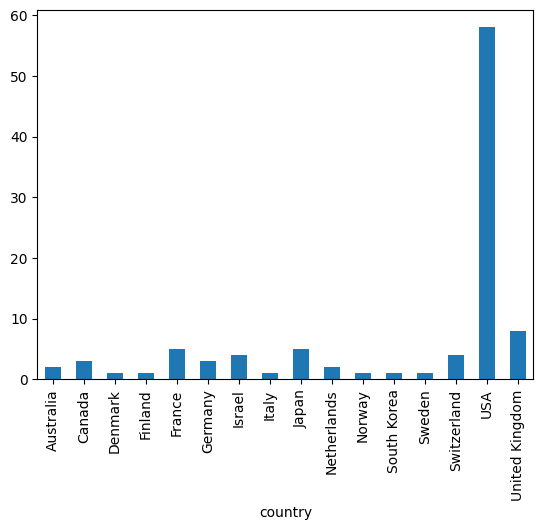

In [17]:
uni[uni.year ==2012].groupby('country').institution.count().plot(kind = 'bar') #creating df for year 2012
#counting no. of institutes to use it as y axis coordinates

**Que B. Data file covid19_testing.csv contains data of covid-19 testing, for the
year 2020, done in various States and Union Territories of India. The following table
describes each column in the dataset:**

In [18]:
import pandas as pd
import numpy as np
import matplotlib as plt
#imported all the packages

In [30]:
cov = pd.read_csv('covid19_testing.csv') #reading the DataFrame file
cov.head() # display data frame

,Month,Date,State,TotalSamples,Negative,Positive
0,4,17,Andaman and Nicobar Islands,1403,1210,12
1,4,2,Andhra Pradesh,1800,1175,132
2,4,10,Andhra Pradesh,6374,6009,365
3,4,11,Andhra Pradesh,6958,6577,381
4,4,12,Andhra Pradesh,6958,6553,405


**1. Check the last seven rows for Karnataka.**

In [20]:
l = cov[(cov.State == 'Karnataka')] #created DataFrame for karnataka state only
l.head() # creating df for state karnataka
l.iloc[-7:] # checking last 7 rows for Karnataka using iloc

,Month,Date,State,TotalSamples,Negative,Positive
1473,7,16,Karnataka,925477,850593,51422
1474,7,17,Karnataka,953417,870466,55115
1475,7,18,Karnataka,982701,899016,59652
1476,7,19,Karnataka,999530,927945,63772
1477,7,20,Karnataka,1025420,958311,67420
1478,7,21,Karnataka,1051976,963725,71069
1479,7,22,Karnataka,1079749,1002045,75833


- 2. Find out for how many days data is present in the dataset for states - Tripura and
Jharkhand.


In [33]:
s = cov[(cov.State == 'Tripura') | (cov.State =='Jharkhand')] # crated DataFrame for 2 required states and assigned to s variable
s

,Month,Date,State,TotalSamples,Negative,Positive
1152,4,10,Jharkhand,1340,1326,14
1153,4,11,Jharkhand,1546,1529,17
1154,4,12,Jharkhand,1683,1666,17
1155,4,13,Jharkhand,1982,1963,19
1156,4,14,Jharkhand,2334,2307,27
...,...,...,...,...,...,...
3093,6,3,Tripura,990028,936809,53219
3094,6,4,Tripura,1006421,952552,53869
3095,6,5,Tripura,1031194,976617,54577
3096,6,6,Tripura,1047299,992068,55231


In [34]:
df = s.groupby('State').Date.count() #grouping together state and count of the total dates present in the  DataFrame
df # display dataframe


State
Jharkhand    220
Tripura      365
Name: Date, dtype: int64

- 3. On which day the total number of positive cases crossed the mark of 1 lakh in
Maharashtra?

In [23]:
m = cov[(cov.State == 'Maharashtra')&(cov.Positive >=100000)] #created df for maharashtra and positive cases >=1 lakh
m.iloc[0] # displaying first element at 0th index hence month and day of the occurance (crossed 1 lakh)

Month                     6
Date                     13
State           Maharashtra
TotalSamples         643057
Negative             535252
Positive             101141
Name: 1840, dtype: object

**4. In the year 2020, which state has tested the highest number of samples?**


In [24]:
test = cov.sort_values('TotalSamples',ascending=False) #sorting and creating new df for TotalSamples, descending order to find highest first
#test.head(1) 3 can also used to display but it shows all columns of df
samples = test.iloc[[1],[2,3]] #reading 1st row and column 2 and 3 showing required data
print('Highest number of samples tested by: \n',samples)

Highest number of samples tested by: 
             State  TotalSamples
1965  Maharashtra       8139466


**5. In the year 2020, which state/UT has tested the lowest number of samples?**

In [35]:
low = cov.sort_values('TotalSamples') #sorting and creating new df for TotalSamples
sample = low.iloc[[1],[2,3]] #locating the 1st row and 2nd+3rd column from 'low' DataFrame 
print('lowest samples tested by: \n',sample) # printing the result

lowest samples tested by: 
         State  TotalSamples
2015  Mizoram            58
